In [1]:
import numpy as np
from math import cos, sqrt
from qu_eig import *
import matplotlib.pyplot as plt

In [2]:
n = 100
omega_c = (2*np.pi) * 1.0
delta   = (2*np.pi) * 0.5
omega_d = (2*np.pi) * 1.2
g       = (2*np.pi) * 0.25
xi      = (2*np.pi) * 1
kappa   = (2*np.pi) * 0.01
t_end = 10

omega_q = omega_c + delta

In [3]:
I = identity(n)
a = destroy(n)
sz = -1.*I
#N = dag(a).dot(a) + sz/2 + 0.5
N = dag(a).dot(a)

D = np.sqrt((delta**2)*I + (4*g**2)*N)

H0 = omega_c*(dag(a).dot(a)) + (omega_c*I-D)*(sz/2)
Hd = (a + dag(a))

def Hd_coeff(t, args):
    xi = args['xi']
    omega_d = args['omega_d']
    return xi*np.cos(omega_d*t)/sqrt(2)

In [4]:
H = [H0, [Hd, Hd_coeff]]
Hd_args = {'xi' : xi, 'omega_d' : omega_d}
H_args = [Hd_args]

psi0 = fock(n, 0)

c_op = sqrt(kappa)*a
#c_op = zeros(n)

e_op = a

In [5]:
cyclePeriod = 2*np.pi/omega_d
cycleRes = 20
cycleCount = int(t_end/cyclePeriod)+1

In [6]:
%time data = eigSolve(H, psi0, cyclePeriod, cycleRes, cycleCount, c_op, e_op,\
                      H_args, ntraj=100)
np.save('testEig_data.npy', data)

Number of Steps per Cycle: 20
Computing Time Step Operators
Total Progress: 100.0%
Done
Running Simulation
Total Progress: 100.0%
Complete
CPU times: user 2.88 s, sys: 49.4 ms, total: 2.93 s
Wall time: 733 ms


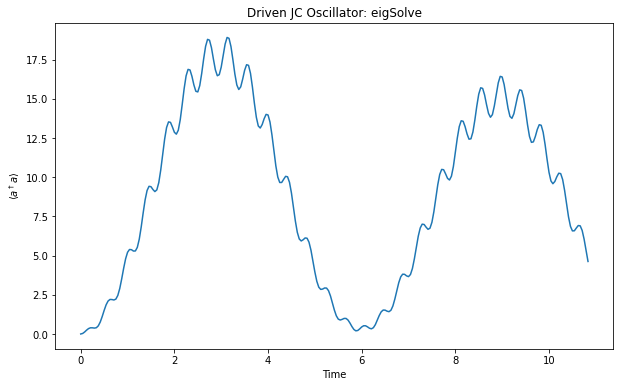

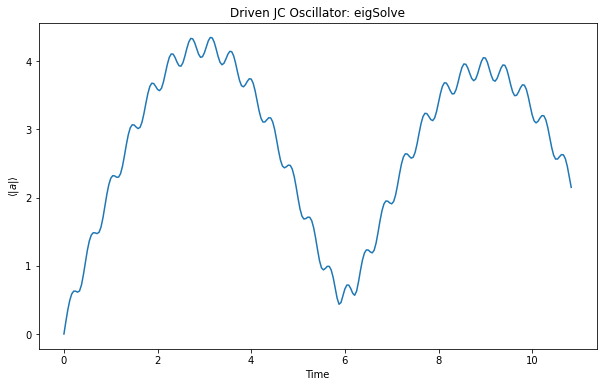

In [7]:
fig = plt.figure(figsize=(10,6))
plt.title('Driven JC Oscillator: eigSolve')
plt.xlabel('Time')
plt.ylabel(r'$\langle a^\dagger a\rangle$')
plt.plot(data[:,0], data[:,1])
plt.show()

fig = plt.figure(figsize=(10,6))
plt.title('Driven JC Oscillator: eigSolve')
plt.xlabel('Time')
plt.ylabel(r'$\langle \|a\|\rangle$')
plt.plot(data[:,0], data[:,2])
plt.show()